# Otto商品分类——决策树模型
原始特征+tfidf特征

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
dpath = './data/'

train1 = pd.read_csv(dpath +"Otto_FE_train_org.csv")
train2 = pd.read_csv(dpath +"Otto_FE_train_tfidf.csv")

#去掉多余的id
train2 = train2.drop(["id","target"], axis=1)
train =  pd.concat([train1, train2], axis = 1, ignore_index=False)
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,1,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.075886,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,4,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,...,0.460983,0.000000,0.008244,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.124622,0.000000,0.000000,0.0,0.0,0.145988,0.0,0.0,0.0


In [3]:
del train1
del train2

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 188 entries, id to feat_93_tfidf
dtypes: float64(186), int64(1), object(1)
memory usage: 88.8+ MB


In [5]:
y = train['target']
X = train.drop(['id', 'target'], axis=1)

feat_names = X.columns

from scipy.sparse import csr_matrix

X = csr_matrix(X)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=2000, train_size=30000, random_state=66)

X_train = pd.DataFrame(data=X_train.toarray(), columns=feat_names)
X_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.098361,0.039216,0.015625,0.0,0.0,0.0,0.0,0.013158,0.023256,0.033333,...,0.0,0.016223,0.023935,0.146691,0.0,0.0,0.019004,0.0,0.017757,0.967419
2,0.016393,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.242791,0.000000,0.0,0.0,0.000000,0.0,0.360254,0.000000
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.098361,0.000000,0.000000,0.0,0.0,0.0,0.0,0.078947,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.166659,0.000000


In [16]:
X_val = pd.DataFrame(data=X_val.toarray(), columns=feat_names)
X_val.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.013158,0.000000,0.0,...,0.0,0.0,0.056377,0.000000,0.061914,0.000000,0.0,0.000000,0.000000,0.0
1,0.04918,0.0,0.0,0.0,0.0,0.0,0.0,0.184211,0.023256,0.0,...,0.0,0.0,0.024661,0.201523,0.027084,0.150148,0.0,0.182952,0.036593,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.046512,0.0,...,0.0,0.0,0.304520,0.103684,0.250823,0.000000,0.0,0.000000,0.000000,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.113359,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.147842,0.000000,0.324727,0.000000,0.0,0.000000,0.000000,0.0


## 默认参数的决策树模型

In [17]:
from sklearn.tree import DecisionTreeClassifier

DT1 = DecisionTreeClassifier()

In [35]:
loss = cross_val_score(DT1, X_train, y_train, cv=3, scoring='neg_log_loss')
print ('logloss of each fold is: ',-loss)
print('mean cv logloss is:', -loss.mean())

logloss of each fold is:  [10.98333089 10.98678477 10.75537497]
mean cv logloss is: 10.908496878059298


## 决策树超参数调优

In [36]:
param_grid = {
    'max_depth':np.arange(5, 50, 5)
    ,'min_samples_leaf':np.arange(1, 10, 1)
}

DT2 = DecisionTreeClassifier(random_state=666)

grid = GridSearchCV(DT2, param_grid=param_grid, cv=3, scoring='neg_log_loss')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=666,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45

In [37]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 9}

In [38]:
-grid.best_score_

1.310984371328671

In [39]:
grid.best_estimator_.score(X_val, y_val)

0.555

In [40]:
max_depth = np.arange(5, 50, 5)
min_samples_leaf = np.arange(1, 10, 1)

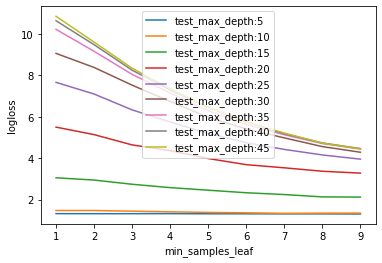

In [41]:
test_means = -grid.cv_results_[ 'mean_test_score' ]

test_scores = np.array(test_means).reshape(len(max_depth), len(min_samples_leaf))

for i, value in enumerate(max_depth):
    plt.plot(min_samples_leaf, test_scores[i], label= 'test_max_depth:' + str(value))
    
plt.legend()
plt.xlabel( 'min_samples_leaf' )                                                                                                      
plt.ylabel( 'logloss' )
plt.show()

In [42]:
max_depth = range(3,10,2) 
min_samples_leaf = range(11,20,2) 
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

DT3 = DecisionTreeClassifier(random_state=666)

grid = GridSearchCV(DT3, param_grid=tuned_parameters, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=666,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         '

In [43]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 19}

In [44]:
-grid.best_score_

1.256297037192417

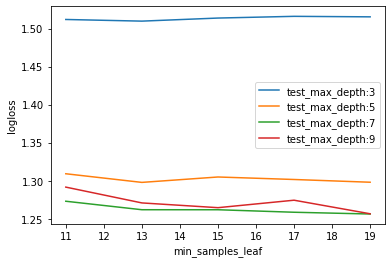

In [45]:
test_means = -grid.cv_results_[ 'mean_test_score' ]

test_scores = np.array(test_means).reshape(len(max_depth), len(min_samples_leaf))

for i, value in enumerate(max_depth):
    plt.plot(min_samples_leaf, test_scores[i], label= 'test_max_depth:' + str(value))
    
plt.legend()
plt.xlabel( 'min_samples_leaf' )                                                                                                      
plt.ylabel( 'logloss' )
plt.show()

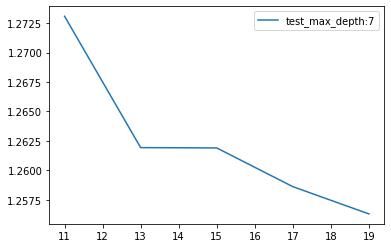

In [47]:
plt.plot(min_samples_leaf, test_scores[2], label= 'test_max_depth:' + str(7))
plt.legend();

In [48]:
max_depth = range(5, 16, 2)
min_samples_leaf = range(20,40,2) 
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

DT4 = DecisionTreeClassifier(random_state=666)

grid = GridSearchCV(DT4, param_grid=tuned_parameters, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=666,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 16, 2),
                         '

In [49]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 38}

In [50]:
-grid.best_score_

1.2112829126948748

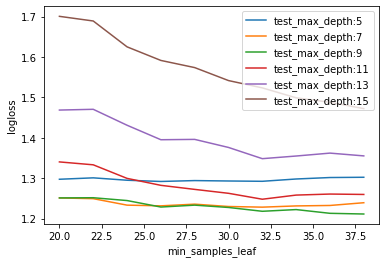

In [51]:
test_means = -grid.cv_results_[ 'mean_test_score' ]

test_scores = np.array(test_means).reshape(len(max_depth), len(min_samples_leaf))

for i, value in enumerate(max_depth):
    plt.plot(min_samples_leaf, test_scores[i], label= 'test_max_depth:' + str(value))
    
plt.legend()
plt.xlabel( 'min_samples_leaf' )                                                                                                      
plt.ylabel( 'logloss' )
plt.show()

In [52]:
grid.best_estimator_.score(X_val, y_val)

0.628

单棵决策树效果确实不是太好